In [26]:
import numpy as np 
import pandas as pd

import os
dir_black = os.path.join('../Black Soil')
dir_Cinder = os.path.join('../Cinder Soil')
dir_Laterite = os.path.join('../Laterite Soil')
dir_peat = os.path.join('../Peat Soil')
dir_yellow = os.path.join('../Yellow Soil')

In [27]:
import tensorflow as tf
from tensorflow import keras

In [28]:
image_size = 220
batch_size = 10


target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

In [29]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        '', 
        target_size=(200, 200),
        batch_size = batch_size,
        classes = [ 'Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil','Yellow Soil'],
       class_mode='categorical')

Found 156 images belonging to 5 classes.


In [30]:
import PIL
for image_batch, label_batch in train_generator:
  break
  image_batch.shape, label_batch.shape

In [31]:
print (train_generator.class_indices)

{'Black Soil': 0, 'Cinder Soil': 1, 'Laterite Soil': 2, 'Peat Soil': 3, 'Yellow Soil': 4}


In [32]:
model = tf.keras.models.Sequential([
    
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(220, 220, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(5, activation='softmax')
])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 218, 218, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 109, 109, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 107, 107, 32)      4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 53, 53, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 51, 51, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 25, 25, 64)      

In [34]:
from keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [35]:
total_sample = train_generator.n
n_epochs = 30

In [36]:
history = model.fit(
        train_generator, 
        steps_per_epoch = int(total_sample/batch_size),  
        epochs = n_epochs,
        verbose = 1)

Epoch 1/30
15/15 [==============================] - 10s 512ms/step - loss: 1.6192 - acc: 0.2671
Epoch 2/30
15/15 [==============================] - 8s 543ms/step - loss: 1.4900 - acc: 0.3533
Epoch 3/30
15/15 [==============================] - 9s 565ms/step - loss: 1.3193 - acc: 0.3562
Epoch 4/30
15/15 [==============================] - 10s 652ms/step - loss: 1.1106 - acc: 0.3904
Epoch 5/30
15/15 [==============================] - 9s 580ms/step - loss: 1.1138 - acc: 0.4521
Epoch 6/30
15/15 [==============================] - 8s 555ms/step - loss: 1.0856 - acc: 0.4795
Epoch 7/30
15/15 [==============================] - 8s 561ms/step - loss: 0.9830 - acc: 0.5137
Epoch 8/30
15/15 [==============================] - 9s 549ms/step - loss: 0.9724 - acc: 0.4658
Epoch 9/30
15/15 [==============================] - 9s 558ms/step - loss: 0.8938 - acc: 0.5959
Epoch 10/30
15/15 [==============================] - 9s 613ms/step - loss: 0.9006 - acc: 0.5822
Epoch 11/30
15/15 [============================

In [37]:
import matplotlib.pyplot as plt


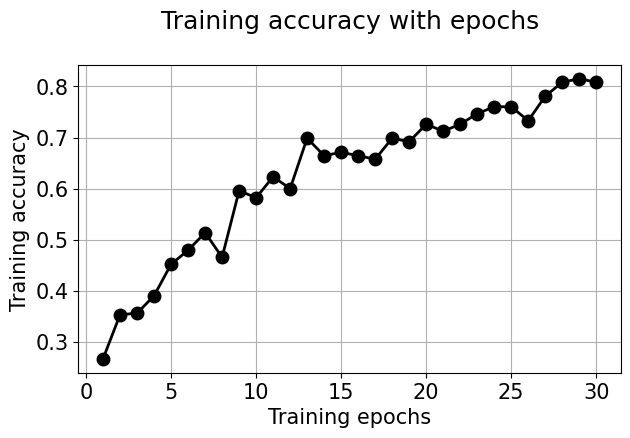

In [38]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [39]:
model.save('my_model2.h5')